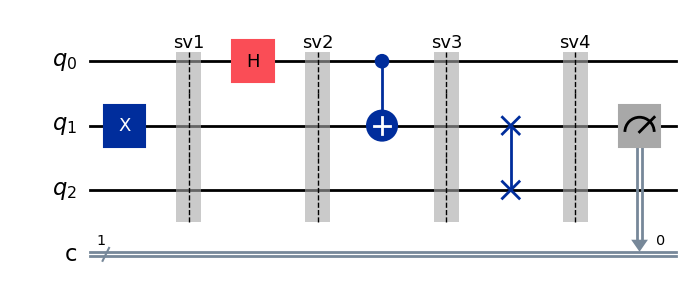

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

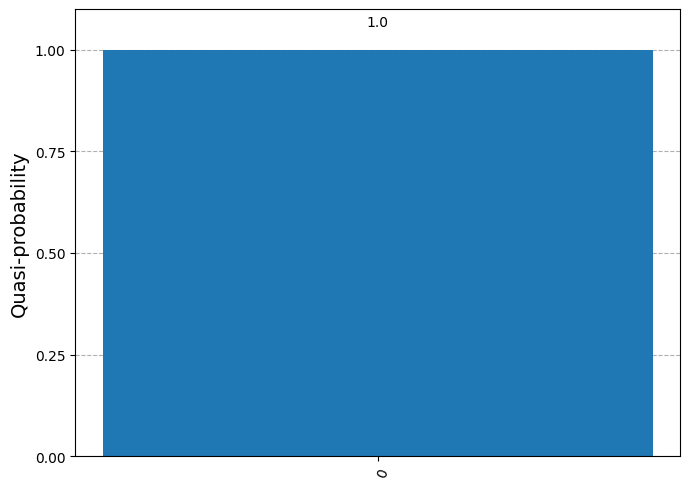

In [11]:
"""quantum_circuit1.ipynb"""

# Cell 01

from IPython.display import display
from qis101_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

qc = QuantumCircuit(3, 1)

qc.x(1)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.cx(0, 1)
qc.save_statevector("sv3")
qc.swap(1, 2)
qc.save_statevector("sv4")
qc.measure(1, 0)

# Do not modify the following code
display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend, optimization_level=1)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))

counts = result.get_counts(qc)
display(plot_distribution(counts))

State vector 4: $\\$
Going by the truth table, there are only two possible qubit state arrangements that can appear with our gate arrangement:
$$ \ket{001} \space \text{or} \space \ket{100} $$ 

Corresponding to equal probability of a single excitation on qubit 0 or qubit 2. These binary strings have values 1 and 4, respectively, meaning we should have a nonzero value at those indices in the state vector. Since the sqaures of those amplitudes must sum to 1, we expect $ \frac{1}{\sqrt{2}} $ to appear at both index 1 and 4 in the state vector.

$\\$
Classical Bit Measurement: $\\$
The single classical bit takes a measurement only of qubit 1, which can have no possible excitation by the end of the gate sequence. Qubit 2 has no excitation prior to the SWAP gate, so it will always accept qubit 1's if it is there, meaning qubit 1 will always have 0 excitation after the SWAP. Since that is the point at which we measure, we will never see excitation on qubit 1.
